# Installs and Imports

In [ ]:
#!pip install negate==1.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 25.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import json
#from negate import Negator

# Load Data and Models

## Tweet Data

In [4]:
with open('tweet_annotation_sentiment_distance_exp1.json', 'r') as json_file:
    exp1 = json.load(json_file)

with open('tweet_annotation_sentiment_distance_exp2.json', 'r') as json_file:
    exp2 = json.load(json_file)

with open('tweet_annotation_sentiment_distance_exp3.json', 'r') as json_file:
    exp3 = json.load(json_file)

tweet_annotation_sentiment_distance = exp1 + exp2 + exp3

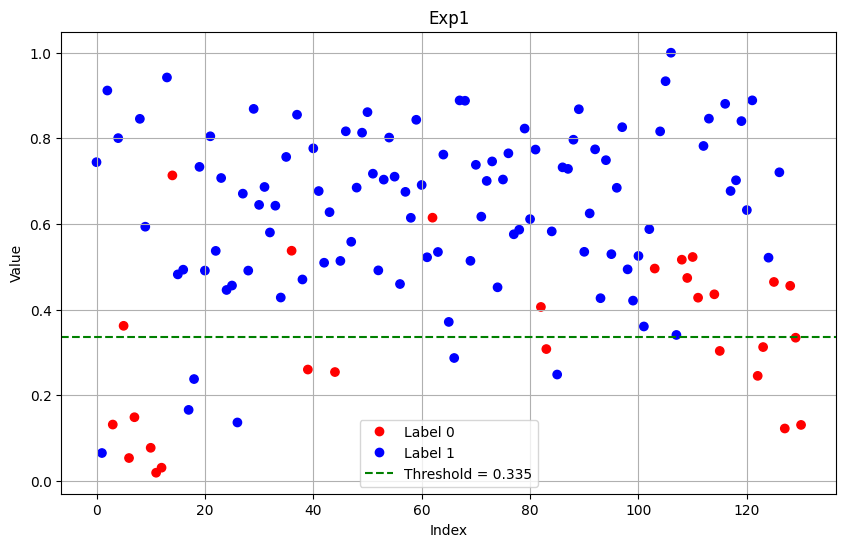

In [16]:
import matplotlib.pyplot as plt

# Example data
data = [x[2] for x in exp1]
labels = [x[1] for x in exp1]  # 0 for red, 1 for blue
threshold = 0.335

# Separate colors based on labels
colors = ['red' if label == 0 else 'blue' for label in labels]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, color=colors, label='Data Points')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Exp1')
plt.legend(handles=[
    plt.Line2D([0], [0], color='red', marker='o', linestyle='None', label='Label 0'),
    plt.Line2D([0], [0], color='blue', marker='o', linestyle='None', label='Label 1'),
    plt.Line2D([0], [0], color='green', linestyle='--', label=f'Threshold = {threshold}')
])
plt.grid()
plt.show()

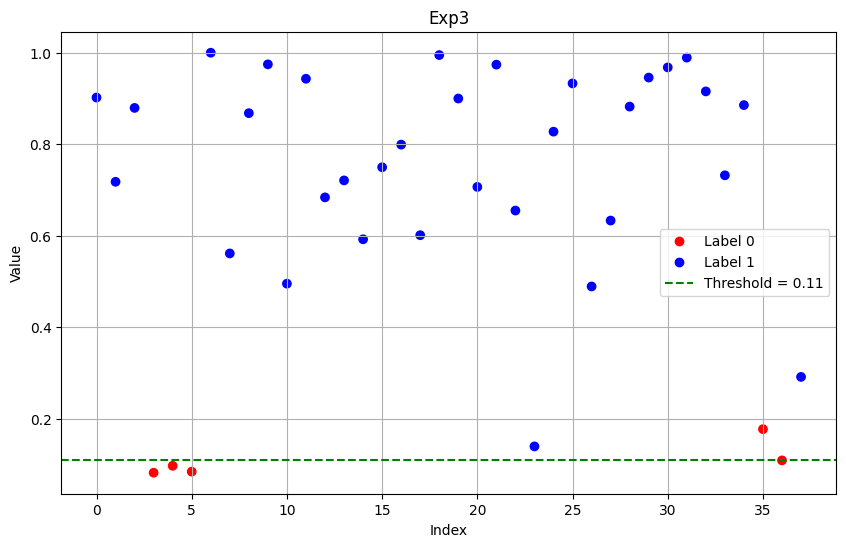

In [17]:
# Example data
data = [x[2] for x in exp3]
labels = [x[1] for x in exp3]  # 0 for red, 1 for blue
threshold = 0.110

# Separate colors based on labels
colors = ['red' if label == 0 else 'blue' for label in labels]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, color=colors, label='Data Points')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Exp2')
plt.legend(handles=[
    plt.Line2D([0], [0], color='red', marker='o', linestyle='None', label='Label 0'),
    plt.Line2D([0], [0], color='blue', marker='o', linestyle='None', label='Label 1'),
    plt.Line2D([0], [0], color='green', linestyle='--', label=f'Threshold = {threshold}')
])
plt.grid()
plt.show()

In [ ]:
# Example data
data = [x[2] for x in exp1]
labels = [x[1] for x in exp1]  # 0 for red, 1 for blue
threshold = 0.335

# Separate colors based on labels
colors = ['red' if label == 0 else 'blue' for label in labels]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, color=colors, label='Data Points')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Exp3')
plt.legend(handles=[
    plt.Line2D([0], [0], color='red', marker='o', linestyle='None', label='Label 0'),
    plt.Line2D([0], [0], color='blue', marker='o', linestyle='None', label='Label 1'),
    plt.Line2D([0], [0], color='green', linestyle='--', label=f'Threshold = {threshold}')
])
plt.grid()
plt.show()

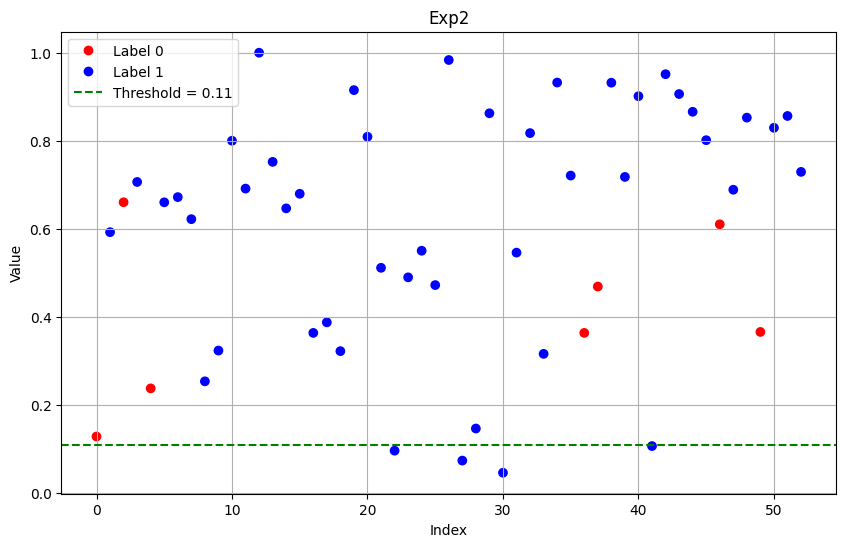

In [8]:
# Example data
data = [x[2] for x in exp2]
labels = [x[1] for x in exp2]  # 0 for red, 1 for blue
threshold = 0.110

# Separate colors based on labels
colors = ['red' if label == 0 else 'blue' for label in labels]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, color=colors, label='Data Points')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data Points Colored by Label with Threshold')
plt.legend(handles=[
    plt.Line2D([0], [0], color='red', marker='o', linestyle='None', label='Label 0'),
    plt.Line2D([0], [0], color='blue', marker='o', linestyle='None', label='Label 1'),
    plt.Line2D([0], [0], color='green', linestyle='--', label=f'Threshold = {threshold}')
])
plt.grid()
plt.show()

## Sentence Negator

In [ ]:
negator = Negator()

# Brute-Force Algorithm for Threshold

In [11]:
def is_sarc(sentiment_dist, threshold):
  """Returns True if the sentiment distance is greater than a given threshold and False otherwise."""

  return sentiment_dist > threshold

In [12]:
import re

def define_threshold(tweet_annotation_sentiment_distance, threshold_list):
  """
  Creates a list of tuples containing 1) the tweet body, 2) the sarc/non-sarc gold annotation, 3) the sentiment distance between V and NP.
  Then, iterates over a list of thresholds and for each threshold calculates the accuracy between the gold annotations and the predicted values.
  Returns a dictionary of thresholds and accuracies for those thresholds.
  """

  # scaling of the data
  sentiment_max = max([x[2] for x in tweet_annotation_sentiment_distance])
  print(sentiment_max)
  tweet_annotation_sentiment_distance = [(t,a, sentiment_dist/sentiment_max) for t, a, sentiment_dist in tweet_annotation_sentiment_distance]
  print(tweet_annotation_sentiment_distance)

  threshold_accuracy_dict = {}
  for threshold in threshold_list:
    correct = 0
    for _, annotation, sentiment_dist in tweet_annotation_sentiment_distance:
      if is_sarc(sentiment_dist, threshold) == bool(annotation):
        correct += 1

    threshold_accuracy_dict[threshold] = correct / len(tweet_annotation_sentiment_distance)

  return threshold_accuracy_dict, tweet_annotation_sentiment_distance

In [13]:
gap = 0.001
threshold_list = list(np.arange(0, 1 + gap, gap))

threshold_accuracy_dict, tweet_annotation_sentiment_distance = define_threshold(tweet_annotation_sentiment_distance, threshold_list)
best_threshold = max(threshold_accuracy_dict, key=threshold_accuracy_dict.get)
print("Best threshold:", best_threshold)
print("Accuracy:", threshold_accuracy_dict[best_threshold])

1.0
[('i looove getting 3 hours of sleep because two jobs', 1, 0.7442864775657654), ('i hate people who use big words just to make themselves look perspicacious', 1, 0.06481124460697174), ('i love that girl who never liked even my dp', 1, 0.9117235541343689), ('I hate that I wasted my whole weekend 😠', 0, 0.13130223751068115), ('i love being ignored', 1, 0.800491452217102), ('I hate this guy so much https://t.co/lHPKXjNLL4', 0, 0.36199110746383667), ('I hate living in such a cold place', 0, 0.05309780314564705), ('I hate seeing my favourite game company go down the drain.', 0, 0.14841583371162415), ('yes because i loved to be ignored', 1, 0.8455244898796082), ("i'm loving the ceasefire in syria", 1, 0.5935276746749878), ('I hate it when a restaurant ignores my dietary requirements', 0, 0.0770023986697197), ('happy international lesbian day i love loving women 😍', 0, 0.018772365525364876), ('I hate paying so much for gas.', 0, 0.030511749908328056), ('i hate it here ❤️❤️❤️❤️❤️', 1, 0.94

In [ ]:
df = pd.DataFrame(columns=['tweet', 'sarcastic'])
df['tweet'] = [x[0] for x in tweet_annotation_sentiment_distance]
df['sarcastic'] = [x[1] for x in tweet_annotation_sentiment_distance]
df

,tweet,sarcastic
0,i looove getting 3 hours of sleep because two ...,1
1,i hate people who use big words just to make t...,1
2,i love that girl who never liked even my dp,1
3,I hate that I wasted my whole weekend 😠,0
4,i love being ignored,1
...,...,...
217,I just absolutely LOVE how I've got to work ou...,1
218,I absolutely love it when its pouring down wit...,1
219,i just love everyone posting wholesome pics wi...,0
220,I just love the smell of one million 😍,0


In [ ]:
df['prediction'] = None
df['correct'] = None
for i in range(df.shape[0]):
  df.at[i, 'prediction'] = int(is_sarc(tweet_annotation_sentiment_distance[i][2], best_threshold))
  df.at[i, 'correct'] = int(df.at[i, 'prediction'] == df.at[i, 'sarcastic'])

In [ ]:
from scipy.stats import binomtest

result = binomtest(sum(df['correct']), df.shape[0], np.mean(df['sarcastic']), alternative='greater')

print(f"p-value: {result.pvalue}")
print(f"Test statistic: {result.statistic}")
print(result)

p-value: 0.12683520863764908
Test statistic: 0.8513513513513513
BinomTestResult(k=189, n=222, alternative='greater', statistic=0.8513513513513513, pvalue=0.12683520863764908)


In [ ]:
df.at[df.shape[0]+1, 'correct'] = np.mean(df['correct'])
df.at[df.shape[0], 'sarcastic'] = np.mean(df['sarcastic'])
df.at[df.shape[0]+1, 'correct'] = f"P-value: {round(result.pvalue, 3)}"

In [ ]:
df

,tweet,sarcastic,prediction,correct
0,i looove getting 3 hours of sleep because two ...,1.00000,1,1
1,i hate people who use big words just to make t...,1.00000,0,0
2,i love that girl who never liked even my dp,1.00000,1,1
3,I hate that I wasted my whole weekend 😠,0.00000,0,1
4,i love being ignored,1.00000,1,1
...,...,...,...,...
219,i just love everyone posting wholesome pics wi...,0.00000,1,0
220,I just love the smell of one million 😍,0.00000,0,1
221,I really love finishing my term with an period...,1.00000,1,1
223,NaN,0.81982,NaN,0.851351


In [ ]:
df.to_csv('exp4_results_27112024.csv', index=False)

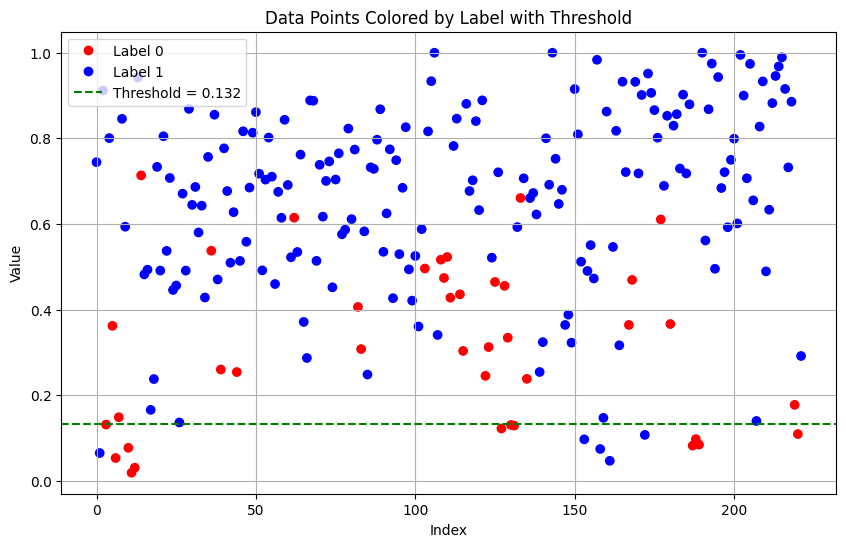

In [15]:
# Example data
data = [x[2] for x in tweet_annotation_sentiment_distance]
labels = [x[1] for x in tweet_annotation_sentiment_distance]  # 0 for red, 1 for blue
threshold = 0.132

# Separate colors based on labels
colors = ['red' if label == 0 else 'blue' for label in labels]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, color=colors, label='Data Points')
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data Points Colored by Label with Threshold')
plt.legend(handles=[
    plt.Line2D([0], [0], color='red', marker='o', linestyle='None', label='Label 0'),
    plt.Line2D([0], [0], color='blue', marker='o', linestyle='None', label='Label 1'),
    plt.Line2D([0], [0], color='green', linestyle='--', label=f'Threshold = {threshold}')
])
plt.grid()
plt.show()

# Rule-based Sarcasm Interpreter

In [ ]:
#Final sarcasm classification function for when we have established the best threshold
def interpret_sarcasm(tweet, verb, noun_phrase, threshold=0.528):
    tweet_sentiment = classify_sentiment(tweet)
    tweet_no_v_sentiment = classify_sentiment(tweet.replace(verb, ""))
    tweet_no_np_sentiment = classify_sentiment(tweet.replace(noun_phrase, ""))
    v_sentiment = tweet_sentiment - tweet_no_v_sentiment
    np_sentiment = tweet_sentiment - tweet_no_np_sentiment

    if np.linalg.norm(v_sentiment - np_sentiment)/6.3885164 > threshold:
      return negator.negate_sentence(tweet)
    else:
      return "The tweet is not sarcastic."

In [ ]:
#TEST!!!!!!!!!!!!!!!!!!!!!!!!!!
#Final sarcasm classification function for when we have established the best threshold
def interpret_sarcasm(tweet, verb, noun_phrase, threshold=0.528):
    tweet_sentiment = classify_sentiment(tweet)
    tweet_no_v_sentiment = classify_sentiment(tweet.replace(verb, ""))
    tweet_no_np_sentiment = classify_sentiment(tweet.replace(noun_phrase, ""))
    v_sentiment = tweet_sentiment - tweet_no_v_sentiment
    np_sentiment = tweet_sentiment - tweet_no_np_sentiment

    if np.linalg.norm(v_sentiment - np_sentiment)/6.3885164 > threshold:
      tweet_no_np = tweet.replace(noun_phrase, "")
      negated_part = negator.negate_sentence(tweet_no_np)
      return negated_part + " " + noun_phrase
    else:
      return "The tweet is not sarcastic."